In [1]:
import pandas as pd
pd.options.display.max_rows = 200

### Tabla: Poblacion en pobreza por aglomerado

In [2]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'P'; grouper = ['Q', 'AGLOMERADO']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Chequea valores de distintos timestamps
# info.groupby(['observable', 'sintetico', 'base'] + grouper).nunique().value_counts()

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()
# info.timestamp.hist()

## Introducir nombres de aglomerados
nomaglos = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
info['AGLOMERADO'] = info['AGLOMERADO'].map(dict(nomaglos.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [3]:
info.nunique()

observable       4
sintetico        7
base             1
Q               21
AGLOMERADO      33
timestamp       21
valor         3440
dtype: int64

In [4]:
pobreza_sum = info.loc[(info.observable.isin(['Total', 'Pobreza'])) & (info.sintetico == 'sum')]

tabla_custom = pobreza_sum.set_index(grouper + ['observable'])['valor'].unstack([-2, -1]).T.sort_index()/1e3

tabla_custom.head()

Q                        2015-02-15  2015-05-15  2016-05-15  2016-08-15  \
AGLOMERADO   observable                                                   
Bahia Blanca Pobreza          72.90       79.75       96.45       83.70   
             Total           289.90      289.90      303.10      303.10   
CABA         Pobreza         397.35      429.25      477.40      391.75   
             Total          2915.00     2915.00     2963.15     2963.15   
Catamarca    Pobreza          71.80       70.40       85.55       68.15   

Q                        2016-11-15  2017-02-15  2017-05-15  2017-08-15  \
AGLOMERADO   observable                                                   
Bahia Blanca Pobreza          88.10       71.30        86.8       73.50   
             Total           303.10      293.60       293.6      293.60   
CABA         Pobreza         430.15      351.75       448.0      357.50   
             Total          2963.15     2909.80      2909.8     2909.80   
Catamarca    Pobreza          67.70       66.95        71.5       64.95   

Q                        2017-11-15  2018-02-15  ...  2018-08-15  2018-11-15  \
AGLOMERADO   observable                          ...                           
Bahia Blanca Pobreza          77.35       68.60  ...       79.55      101.75   
             Total           293.60      290.20  ...      290.20      290.20   
CABA         Pobreza         386.75      335.65  ...      439.70      576.00   
             Total          2909.80     2949.20  ...     2949.20     2949.20   
Catamarca    Pobreza          63.50       73.65  ...       78.70       93.65   

Q                        2019-02-15  2019-05-15  2019-08-15  2019-11-15  \
AGLOMERADO   observable                                                   
Bahia Blanca Pobreza         107.60      113.05       95.00      111.10   
             Total           301.75      301.75      301.75      301.75   
CABA         Pobreza         502.40      595.35      497.10      675.30   
             Total          2937.35     2937.35     2937.35     2937.35   
Catamarca    Pobreza          83.75       96.25       88.50       93.40   

Q                        2020-02-15  2020-05-15  2020-08-15  2020-11-15  
AGLOMERADO   observable                                                  
Bahia Blanca Pobreza         100.00      124.65      100.00      113.95  
             Total           298.55      298.55      298.55      298.55  
CABA         Pobreza         480.60      609.35      420.45      572.45  
             Total          2953.70     2953.70     2953.70     2953.70  
Catamarca    Pobreza          84.55       95.35       95.90      103.85  

[5 rows x 21 columns]

In [5]:
tabla_custom.to_excel('./personas_pob_total_AGLO.xlsx')

### Grafico: Dist ingresos por AGLO

In [ ]:
import numpy as np


In [6]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'M24'; grouper = ['Q', 'AGLOMERADO']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Chequea valores de distintos timestamps
# info.groupby(['observable', 'sintetico', 'base'] + grouper).nunique().value_counts()

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()
# info.timestamp.hist()

## Introducir nombres de aglomerados
nomaglos = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
info['AGLOMERADO'] = info['AGLOMERADO'].map(dict(nomaglos.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [7]:
ingresos = info.loc[info.observable.str.contains('P47T_')]
# info.observable.unique()
ingresos = ingresos[['sintetico', 'Q', 'AGLOMERADO', 'valor']]


In [8]:
ingresos_17 = ingresos.loc[ingresos['Q'].dt.year == 2017]

In [18]:
data = ingresos_17.groupby(['AGLOMERADO', 'sintetico'])['valor'].mean().unstack().sort_values('mean')

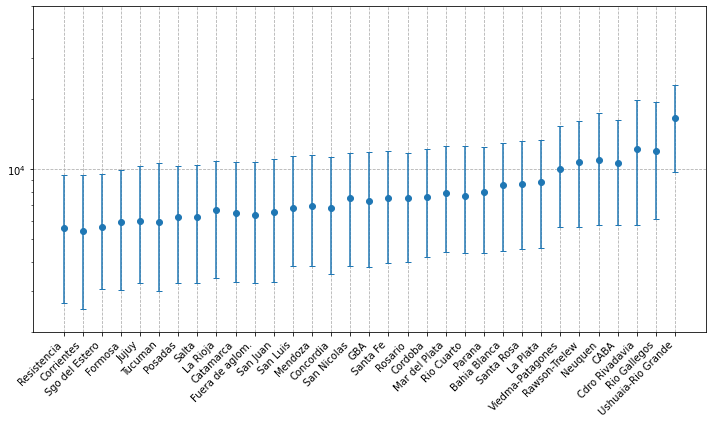

In [33]:
# _2017 = ['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15']

# tabla_custom[_2017]

import matplotlib.pyplot as plt
 
nAGLOS = ingresos['AGLOMERADO'].nunique()
x = range(nAGLOS)


y = data['median']

# creating error
y_errormin = data['median'] - data['q25']
y_errormax = data['q75'] - data['median']

x_error = 0
y_error =[y_errormin, y_errormax]
 
# plotting graph
# plt.plot(x, y)
fig, ax = plt.subplots(1, figsize = (10, 6))
plt.errorbar(x, y, capsize = 3,
             yerr = y_error,
             xerr = x_error,
             fmt ='o')

ax.set_yticks(np.arange(2e3, 5e4, 2e3)); 
ax.set_xticks(range(nAGLOS))
ax.set_xticklabels(data.index.values)

plt.yscale('log'); plt.ylim(2e3, 5e4)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle = '--')
plt.savefig('./example_fig.png')
plt.show()

### Tabla: Poblacion en pobreza por provincia y Aglo si/no

In [11]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'P'; grouper = ['Q', 'PROV', 'AGLO_si']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()

## Introducir nombres de provincia
nomprovs = pd.read_csv('./../data/info/prov_regs.csv')[['PROV', 'NOMPROV']]
info['PROV'] = info['PROV'].map(dict(nomprovs.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [12]:
pobreza_sum = info.loc[(info.observable.isin(['Total', 'Pobreza'])) & (info.sintetico == 'sum')]

tabla_custom = pobreza_sum.set_index(grouper + ['observable'])['valor'].unstack([-3, -2, -1]).T.sort_index()/1e3

tabla_custom.head()

Q                                2015-02-15  2015-05-15  2016-05-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza        1056.50     1112.20     1279.40   
                     Total          3320.90     3320.90     3283.95   
             True    Pobreza        4445.45     4928.15     5425.45   
                     Total         13337.65    13337.65    13483.85   
Catamarca    False   Pobreza          97.95      102.30      107.05   

Q                                2016-08-15  2016-11-15  2017-02-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza        1131.25     1159.80      983.00   
                     Total          3283.95     3283.95     3301.65   
             True    Pobreza        4926.15     5030.30     4371.15   
                     Total         13483.85    13483.85    13604.55   
Catamarca    False   Pobreza          92.80       99.60       98.85   

Q                                2017-05-15  2017-08-15  2017-11-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza        1158.80     1020.45     1090.85   
                     Total          3301.65     3301.65     3301.65   
             True    Pobreza        4990.40     4292.95     4770.95   
                     Total         13604.55    13604.55    13604.55   
Catamarca    False   Pobreza         109.15       98.85      101.60   

Q                                2018-02-15  ...  2018-08-15  2018-11-15  \
PROV         AGLO_si observable              ...                           
Buenos Aires False   Pobreza        1066.45  ...     1181.25     1465.25   
                     Total          3330.60  ...     3330.60     3330.60   
             True    Pobreza        4326.50  ...     5137.15     6357.60   
                     Total         13717.55  ...    13717.55    13717.55   
Catamarca    False   Pobreza         101.85  ...      103.10      121.45   

Q                                2019-02-15  2019-05-15  2019-08-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza        1366.20     1516.60     1356.05   
                     Total          3327.30     3327.30     3327.30   
             True    Pobreza        5833.25     6755.35     5950.95   
                     Total         13935.55    13935.55    13935.55   
Catamarca    False   Pobreza         122.60      133.90      120.85   

Q                                2019-11-15  2020-02-15  2020-05-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza        1519.40     1315.90     1655.95   
                     Total          3327.30     3371.45     3371.45   
             True    Pobreza        6519.35     5520.20     7192.55   
                     Total         13935.55    14008.35    14008.35   
Catamarca    False   Pobreza         131.40      109.25      122.90   

Q                                2020-08-15  2020-11-15  
PROV         AGLO_si observable                          
Buenos Aires False   Pobreza        1381.80     1620.45  
                     Total          3371.45     3371.45  
             True    Pobreza        6055.95     7183.85  
                     Total         14008.35    14008.35  
Catamarca    False   Pobreza         112.70      131.30  

[5 rows x 21 columns]

In [13]:
tabla_custom.to_excel('./personas_pob_total_PROV_AGLOsi.xlsx')

## Graficos:

### Barras para cantidad de pobreza

In [14]:
_2017 = ['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15']

data = tabla_custom[_2017].mean(1).unstack([-1, -2]).sort_index(axis = 1)
data.head()

observable                         Pobreza               Total          
AGLO_si                              False      True     False     True 
PROV                                                                    
Buenos Aires                     1063.2750  4606.3625  3301.65  13604.55
Catamarca                         102.1125    66.7250   230.95    189.10
Chaco                             414.6500   179.4625   728.65    413.50
Chubut                             89.3625    75.5750   264.90    316.90
Ciudad Autónoma de Buenos Aires     0.0500   386.0000     1.25   2909.80

In [15]:
# import matplotlib.pyplot as plt
# colors = plt.cm.Paired.colors

# fig, ax = plt.subplots(1, figsize = (15, 10))
# # (data['Pobreza']+data['Total']).plot(kind='bar', color=[colors[1], colors[0]], rot=0, ax=ax) # stacked
# data['Total'].plot(kind='bar', color=['.5', '.5'], rot=0, ax=ax, alpha = .5)
# data['Pobreza'].plot(kind='bar', color=[colors[3], colors[2]], rot=0, ax=ax, alpha = 1)

# # legend_labels = [f'{val} ({context})' for val, context in data.columns]
# # ax.legend(legend_labels)

# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### Ingreso por provincia